In [9]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Parte 01.- Limpieza de Datos

In [10]:
import pandas as pd
filename = '/content/drive/MyDrive/Colab Notebooks/02. Coding Dojo/Semana 03/01. Plataforma/Proyecto 01 - Parte 02/sales_predictions.csv'
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Analizaremos los valores que tengan nulos: 'Item Weight" y "Oulet_Size"

In [12]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Se tendrá que hacer una corrección más adelante para estandarizar esta columna, sin embargo solo se presentan dos tipos. Low Fat y Regular. Existen 1463 valores nuloes para la columna Item_Weight.

In [13]:
#Doble Filtro para saber si hay filas con valores faltantes de Item_Weight y Outlet_Size
filter_weight = df['Item_Weight'].isnull()
filter_outlet_size = df['Outlet_Size'].isnull()

df.loc[filter_weight & filter_outlet_size,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


*Observamos de que no hay filas faltantes las cuales tengan valores nulos tanto en peso y talla, por lo que trataremos de encontrar una relación para reemplazar los datos faltantes.*

### a) Recuperación de los valores de Outlet_size

In [14]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
df1 = df.loc[df['Outlet_Size'].isnull(),:]
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


Se identifica una frecuencia en los valores de Outlet_Identifier. Además de que están relacionados los valores de Outlet_Identifier con Locationtype y oulet type

In [16]:
df1['Outlet_Identifier'].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

Regresamos a nuestro df original para ver si existe una relación macro entre el identificador y el tipo de locación.

In [17]:
df.groupby(['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Identifier'])[['Item_Identifier']].count()

Item_Identifier
Outlet_Type       Outlet_Location_Type Outlet_Identifier                 
Grocery Store     Tier 1               OUT019                         528
                  Tier 3               OUT010                         555
Supermarket Type1 Tier 1               OUT046                         930
                                       OUT049                         930
                  Tier 2               OUT017                         926
                                       OUT035                         930
                                       OUT045                         929
                  Tier 3               OUT013                         932
Supermarket Type2 Tier 3               OUT018                         928
Supermarket Type3 Tier 3               OUT027                         935

De esto observamos que todos los valores pertenencen a una misma tienda.

- OUT017 > Supermarket Type1
- OUT045 > Supermarket Type1
- OUT010 > Grocery Store

Ahora compararemos las ventas totales entre cada tipo de tienda

In [18]:
df.groupby(['Outlet_Type','Outlet_Location_Type','Outlet_Identifier','Outlet_Size'])[['Item_Outlet_Sales']].sum().round(2)

Item_Outlet_Sales
Outlet_Type       Outlet_Location_Type Outlet_Identifier Outlet_Size                   
Grocery Store     Tier 1               OUT019            Small                179694.09
Supermarket Type1 Tier 1               OUT046            Small               2118395.17
                                       OUT049            Medium              2183969.81
                  Tier 2               OUT035            Small               2268122.94
                  Tier 3               OUT013            High                2142663.58
Supermarket Type2 Tier 3               OUT018            Medium              1851822.83
Supermarket Type3 Tier 3               OUT027            Medium              3453926.05

No salen los identificadores completos, ya que se tiene valores faltantes dentro de los Identificadores, quitaremos outlet Size para ver alguna relación

In [19]:
df.groupby(['Outlet_Type','Outlet_Location_Type','Outlet_Identifier'])[['Item_Outlet_Sales']].sum().round(2)

Item_Outlet_Sales
Outlet_Type       Outlet_Location_Type Outlet_Identifier                   
Grocery Store     Tier 1               OUT019                     179694.09
                  Tier 3               OUT010                     188340.17
Supermarket Type1 Tier 1               OUT046                    2118395.17
                                       OUT049                    2183969.81
                  Tier 2               OUT017                    2167465.29
                                       OUT035                    2268122.94
                                       OUT045                    2036725.48
                  Tier 3               OUT013                    2142663.58
Supermarket Type2 Tier 3               OUT018                    1851822.83
Supermarket Type3 Tier 3               OUT027                    3453926.05

- Visualizamos que dentro de Grocery Store, OUT010 Tiene mayores salidas de ventas que OUT019 (Small). Por lo que se le asignará un (Medium).
- Por otro lado en la categoría Supermercado tipo 1 y tier 2. Tenemos:

OUT017 >> 2.167
OUT035 >> 2.268 (Small)
OUT045 >> 2.036

Cuyos ambos valores son inferiores, por lo que se procederá a asignarles un valor de Small

Quedando:

- OUT017 > Small
- OUT045 > Small
- OUT010 > Medium

In [20]:
# Reemplazamos los valores correspondientes
OUT010_filter = df['Outlet_Identifier'] == 'OUT010'
OUT045_filter = df['Outlet_Identifier'] == 'OUT045'
OUT017_filter = df['Outlet_Identifier'] == 'OUT017'

df.loc[OUT010_filter, 'Outlet_Size']=df.loc[OUT010_filter, 'Outlet_Size'].fillna('Medium')
df.loc[(OUT017_filter | OUT045_filter), 'Outlet_Size']=df.loc[(OUT017_filter | OUT045_filter), 'Outlet_Size'].fillna('Small')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [21]:
df.groupby(['Outlet_Type','Outlet_Location_Type','Outlet_Identifier','Outlet_Size'])[['Item_Outlet_Sales']].sum().round(2)

Item_Outlet_Sales
Outlet_Type       Outlet_Location_Type Outlet_Identifier Outlet_Size                   
Grocery Store     Tier 1               OUT019            Small                179694.09
                  Tier 3               OUT010            Medium               188340.17
Supermarket Type1 Tier 1               OUT046            Small               2118395.17
                                       OUT049            Medium              2183969.81
                  Tier 2               OUT017            Small               2167465.29
                                       OUT035            Small               2268122.94
                                       OUT045            Small               2036725.48
                  Tier 3               OUT013            High                2142663.58
Supermarket Type2 Tier 3               OUT018            Medium              1851822.83
Supermarket Type3 Tier 3               OUT027            Medium              3453926.05

### b) Identificar valores de Item_Fat_Content

In [22]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [23]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [24]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Primero vamos a normalizar los valores

In [25]:
df["Item_Fat_Content"].replace("LF", "Low Fat", inplace=True)
df["Item_Fat_Content"].replace("low fat", "Low Fat", inplace=True)
df["Item_Fat_Content"].replace("reg", "Regular", inplace=True)
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Partiendo de la hipotesis que otras tiendas vendan los mismo productos, buscaremos una forma de relacionarlos. Basandonos del ID unico del producto

Item_Identifier	Número de identificación único del producto

In [26]:
df['Item_Identifier'].value_counts().reset_index()

,index,Item_Identifier
0,FDW13,10
1,FDG33,10
2,NCY18,9
3,FDD38,9
4,DRE49,9
...,...,...
1554,FDY43,1
1555,FDQ60,1
1556,FDO33,1
1557,DRF48,1


Existen 1559 valores únicos registrados. Ahora analizaremos los valores los cuales no tienen peso

In [27]:
df.groupby(['Item_Identifier', 'Item_Weight'])[['Item_Weight']].count()

,,Item_Weight
Item_Identifier,Item_Weight,
DRA12,11.600,6
DRA24,19.350,5
DRA59,8.270,6
DRB01,7.390,2
DRB13,6.115,5
...,...,...
NCZ30,6.590,6
NCZ41,19.850,5
NCZ42,10.500,5


Existe una diferencia de 4 filas, lo que significa que hay cuatro valores únicos los cuales no registraron peso.

In [28]:
# Elaboramos una lista de productos únicos
lisn1=[]
for x in df['Item_Identifier'].unique():
  lisn1.append(x)
print(lisn1)

['FDA15', 'DRC01', 'FDN15', 'FDX07', 'NCD19', 'FDP36', 'FDO10', 'FDP10', 'FDH17', 'FDU28', 'FDY07', 'FDA03', 'FDX32', 'FDS46', 'FDF32', 'FDP49', 'NCB42', 'DRI11', 'FDU02', 'FDN22', 'FDW12', 'NCB30', 'FDC37', 'FDR28', 'NCD06', 'FDV10', 'DRJ59', 'FDE51', 'FDC14', 'FDV38', 'NCS17', 'FDP33', 'FDO23', 'DRH01', 'NCX29', 'FDV20', 'DRZ11', 'FDX10', 'FDB34', 'FDK43', 'FDA46', 'FDC02', 'FDL50', 'FDM39', 'NCP05', 'FDV49', 'FDL12', 'FDS02', 'NCL17', 'FDM40', 'FDR13', 'FDA43', 'NCP18', 'FDK21', 'NCX54', 'DRK35', 'FDY21', 'FDI26', 'FDM20', 'FDV27', 'FDF09', 'FDY40', 'FDY45', 'FDC46', 'FDH19', 'FDZ03', 'DRH37', 'NCI17', 'FDJ58', 'FDH35', 'FDG02', 'NCZ18', 'FDC29', 'FDQ10', 'FDN48', 'FDL04', 'FDV25', 'FDD58', 'FDN04', 'FDV45', 'NCL18', 'FDR12', 'FDG20', 'FDZ55', 'FDQ49', 'FDN33', 'FDN27', 'FDW20', 'DRG27', 'DRI25', 'FDA44', 'NCR17', 'FDU04', 'FDF41', 'FDB56', 'FDT28', 'FDD10', 'FDW57', 'DRB48', 'FDP09', 'FDH14', 'FDA47', 'FDG12', 'DRE60', 'DRK49', 'FDD03', 'FDS52', 'FDW39', 'FDX34', 'FDV11', 'FDD17', 

In [29]:
df_muestra = df.groupby(['Item_Identifier', 'Item_Weight'])[['Item_Visibility']].count().reset_index()
df_muestra

,Item_Identifier,Item_Weight,Item_Visibility
0,DRA12,11.600,6
1,DRA24,19.350,5
2,DRA59,8.270,6
3,DRB01,7.390,2
4,DRB13,6.115,5
...,...,...,...
1550,NCZ30,6.590,6
1551,NCZ41,19.850,5
1552,NCZ42,10.500,5
1553,NCZ53,9.600,4


In [30]:
print(df_muestra['Item_Identifier'])

0       DRA12
1       DRA24
2       DRA59
3       DRB01
4       DRB13
        ...  
1550    NCZ30
1551    NCZ41
1552    NCZ42
1553    NCZ53
1554    NCZ54
Name: Item_Identifier, Length: 1555, dtype: object


In [31]:
set_lista_grande = pd.DataFrame(lisn1, columns=['Item_Identifier'])
set_lista_pequeña = pd.DataFrame(df_muestra['Item_Identifier'])

In [32]:
## Ubicamos valores unicos faltantes
valores_faltantes = set_lista_grande[~set_lista_grande['Item_Identifier'].isin(set_lista_pequeña['Item_Identifier'])]
valores_faltantes

,Item_Identifier
711,FDN52
1130,FDK57
1494,FDE52
1539,FDQ60


Vamos uno a uno para identificar si hay valores que se podría completar

In [33]:
#Revisión FDN52
Id_filter=df['Item_Identifier'] == 'FDN52'
df.loc[Id_filter]['Item_Weight']

927   NaN
Name: Item_Weight, dtype: float64

In [34]:
#Revisión FDK57
Id_filter=df['Item_Identifier'] == 'FDK57'
df.loc[Id_filter]['Item_Weight']

1922   NaN
Name: Item_Weight, dtype: float64

In [35]:
#Revisión FDE52
Id_filter=df['Item_Identifier'] == 'FDE52'
df.loc[Id_filter]['Item_Weight']

4187   NaN
Name: Item_Weight, dtype: float64

In [36]:
#Revisión FDQ60
Id_filter=df['Item_Identifier'] == 'FDQ60'
df.loc[Id_filter]['Item_Weight']

5022   NaN
Name: Item_Weight, dtype: float64

Vamos con los valores nulos y que tiene identificador

In [37]:
df_null_weight = df.loc[df['Item_Weight'].isnull(),:]
df_null_weight

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [38]:
df_list_null = df_null_weight['Item_Identifier'].value_counts().reset_index()
df_list_null = df_list_null.rename(columns={'index': 'Item_Identifier','Item_Identifier': 'Item_Identifier_count'})
df_list_null

,Item_Identifier,Item_Identifier_count
0,FDK08,2
1,FDA08,2
2,FDV23,2
3,FDY56,2
4,FDI04,2
...,...,...
1137,FDM44,1
1138,FDZ48,1
1139,FDK41,1
1140,FDD57,1


In [39]:
df_base = df.groupby(['Item_Identifier', 'Item_Weight'])[['Item_Visibility']].count().reset_index()
df_peso_identifier = df_base[['Item_Identifier','Item_Weight']]
df_peso_identifier

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1550,NCZ30,6.590
1551,NCZ41,19.850
1552,NCZ42,10.500
1553,NCZ53,9.600


Buscamos Item a Item, valores repetidos y los asignamos a los valores con un valor null.

In [40]:
for x in lisn1:
  id_filter=df['Item_Identifier'] == x
  m=df.loc[id_filter]['Item_Weight'].max()
  df.loc[id_filter,'Item_Weight']=df.loc[id_filter]['Item_Weight'].fillna(m)

In [41]:
#validamos duplicados
df.duplicated().sum()

0

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Corroboramos que solo existen 4 valores los cuales no fueron reemplazados, esto debido a que son valores únicos.

In [43]:
tabla_null=df[df['Item_Weight'].isna()]
tabla_null

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [44]:
#Identificamos a qué tipo pertenecen
lisn2=list(tabla_null['Item_Type'])
lisn2

['Frozen Foods', 'Snack Foods', 'Dairy', 'Baking Goods']

Para no perder estos datos, ya que los Item Oulet sales es un valor considerable, haremos el promedio de los item type y les asignaremos ese valor.

In [45]:
for x in lisn2:
  type_filter=df['Item_Type'] == x
  mean=df.loc[type_filter]['Item_Weight'].mean()
  df.loc[type_filter,'Item_Weight']=df.loc[type_filter]['Item_Weight'].fillna(mean)

Finalmente verificamos que no existan valores nulos

In [46]:
df[df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [47]:
#Y verificamos valores estadísticos de algunas columnas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.875418,4.645016,4.555,8.785000,12.650000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


#Parte 02. Visualizaciones


*Comenzamos esta nueva sección del proyecto donde utilizaremos visualizaciones para poder entender mejor el comportamiento de nuestra data*

In [48]:
import matplotlib.pyplot as plt
import numpy as np

In [49]:
# Variables con valores numéricos para analizar tendencias
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.875418,4.645016,4.555,8.785000,12.650000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [50]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 01. Análisis Macro de las Ventas

In [51]:
gf1 = df.groupby(['Outlet_Type','Outlet_Identifier'])[['Item_Outlet_Sales']].sum().round(2).reset_index()
gf1

,Outlet_Type,Outlet_Identifier,Item_Outlet_Sales
0,Grocery Store,OUT010,188340.17
1,Grocery Store,OUT019,179694.09
2,Supermarket Type1,OUT013,2142663.58
3,Supermarket Type1,OUT017,2167465.29
4,Supermarket Type1,OUT035,2268122.94
5,Supermarket Type1,OUT045,2036725.48
6,Supermarket Type1,OUT046,2118395.17
7,Supermarket Type1,OUT049,2183969.81
8,Supermarket Type2,OUT018,1851822.83
9,Supermarket Type3,OUT027,3453926.05


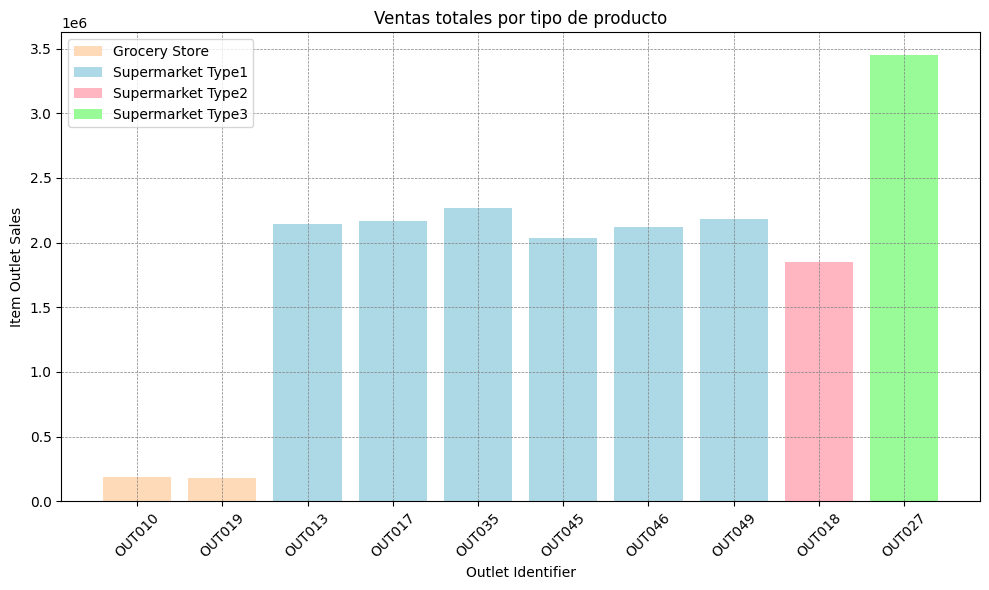

In [52]:
# Asignar colores pastel a cada tipo de salida
colors = {'Grocery Store': '#FFDAB9', 'Supermarket Type1': '#ADD8E6', 'Supermarket Type2': '#FFB6C1', 'Supermarket Type3': '#98FB98'}

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
for outlet_type, color in colors.items():
    subset = gf1[gf1['Outlet_Type'] == outlet_type]
    plt.bar(subset['Outlet_Identifier'], subset['Item_Outlet_Sales'], color=color, label=outlet_type)

plt.xlabel('Outlet Identifier')
plt.ylabel('Item Outlet Sales')
plt.title('Ventas totales por tipo de producto')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()

*Figura 01.- Observamos que la mayor cantidad de ventas por determinado tipo de producto se da en el OUT027 en Supermarket Type3, sin embargo el mayor volumen de ventas se da para el Supermarket Type1. Mientras que los valores más bajos en ventas totales y ventas por producto se dan el la Grocery Store*

In [53]:
gf2 = df.groupby(['Outlet_Type'])[['Item_Outlet_Sales']].sum().reset_index()
gf2

,Outlet_Type,Item_Outlet_Sales
0,Grocery Store,3.680343e+05
1,Supermarket Type1,1.291734e+07
2,Supermarket Type2,1.851823e+06
3,Supermarket Type3,3.453926e+06


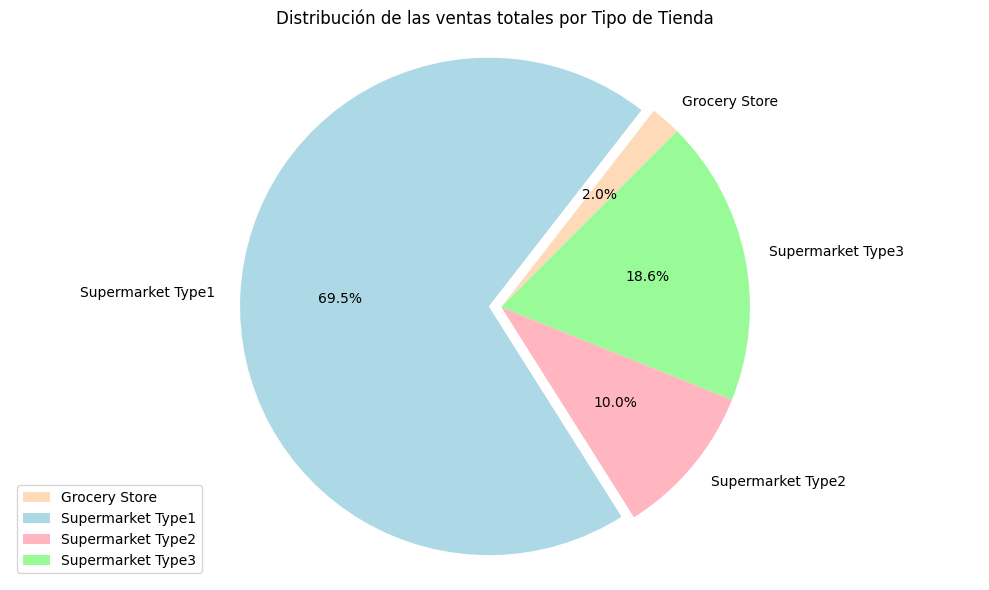

In [54]:
plt.figure(figsize=(10, 6))
explode = (0, 0.05, 0, 0)
colores = ['#FFDAB9', '#ADD8E6', '#FFB6C1', '#98FB98']
plt.pie(gf2['Item_Outlet_Sales'],labels = gf2['Outlet_Type'], explode=explode,colors=colores, autopct='%1.1f%%', startangle=45)
plt.title('Distribución de las ventas totales por Tipo de Tienda')
plt.legend(loc = 'lower left')
plt.axis('equal')
plt.tight_layout()
plt.show;

*Figura 02.- Evaluando todo el volumen de ventas, corroboramos lo mencionado en la figura 01, el Supermarket Type1 llega a tener un volumen del total de ventas de un 69.5% mientras que la Grocery Store apenas un 2%*

## 01. Análisis Focalizado

Analizaremos el comportamiento de tienda en tienda. Así compararemos resultados y valores que puedan darnos más información de las ventas de los productos y como mejorar estas.

### a) Grocery Store
 *De la Figura 01. Observamos que OUT010 y OUT019 tienen una cantidad de ventas muy similares, rondando los 1.8E5 ventas totales. Reduciremos nuestra muestra para analizar estas dos variables*

In [55]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [56]:
filtro_OUT010 = df['Outlet_Identifier'] == 'OUT010'
filtro_OUT019 = df['Outlet_Identifier'] == 'OUT019'
df.loc[filtro_OUT010 | filtro_OUT019,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
23,FDC37,15.500,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Medium,Tier 3,Grocery Store,178.4344
29,FDC14,14.500,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Medium,Tier 3,Grocery Store,163.7868
...,...,...,...,...,...,...,...,...,...,...,...,...
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,Medium,Tier 3,Grocery Store,431.4384
8480,FDQ58,7.315,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,Medium,Tier 3,Grocery Store,45.2744
8490,FDU44,12.150,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [57]:
# Reducimos nuestras muestras
df_OUT010 = df.loc[filtro_OUT010,:]
df_OUT019 = df.loc[filtro_OUT019,:]

In [58]:
gf_OUT010 = df_OUT010['Item_Type'].value_counts().reset_index()
gf_OUT010 = gf_OUT010.rename(columns={'index': 'Item_Type', 'Item_Type': 'Cantidad_Item_Type'})
gf_OUT010

,Item_Type,Cantidad_Item_Type
0,Fruits and Vegetables,79
1,Snack Foods,71
2,Household,67
3,Frozen Foods,54
4,Dairy,43
5,Baking Goods,42
6,Health and Hygiene,37
7,Canned,35
8,Meat,34
9,Soft Drinks,28


In [59]:
gf_OUT019 = df_OUT019['Item_Type'].value_counts().reset_index()
gf_OUT019 = gf_OUT019.rename(columns={'index': 'Item_Type', 'Item_Type': 'Cantidad_Item_Type'})
gf_OUT019

,Item_Type,Cantidad_Item_Type
0,Snack Foods,75
1,Fruits and Vegetables,73
2,Household,52
3,Dairy,49
4,Frozen Foods,49
5,Baking Goods,43
6,Canned,38
7,Meat,32
8,Health and Hygiene,30
9,Soft Drinks,26


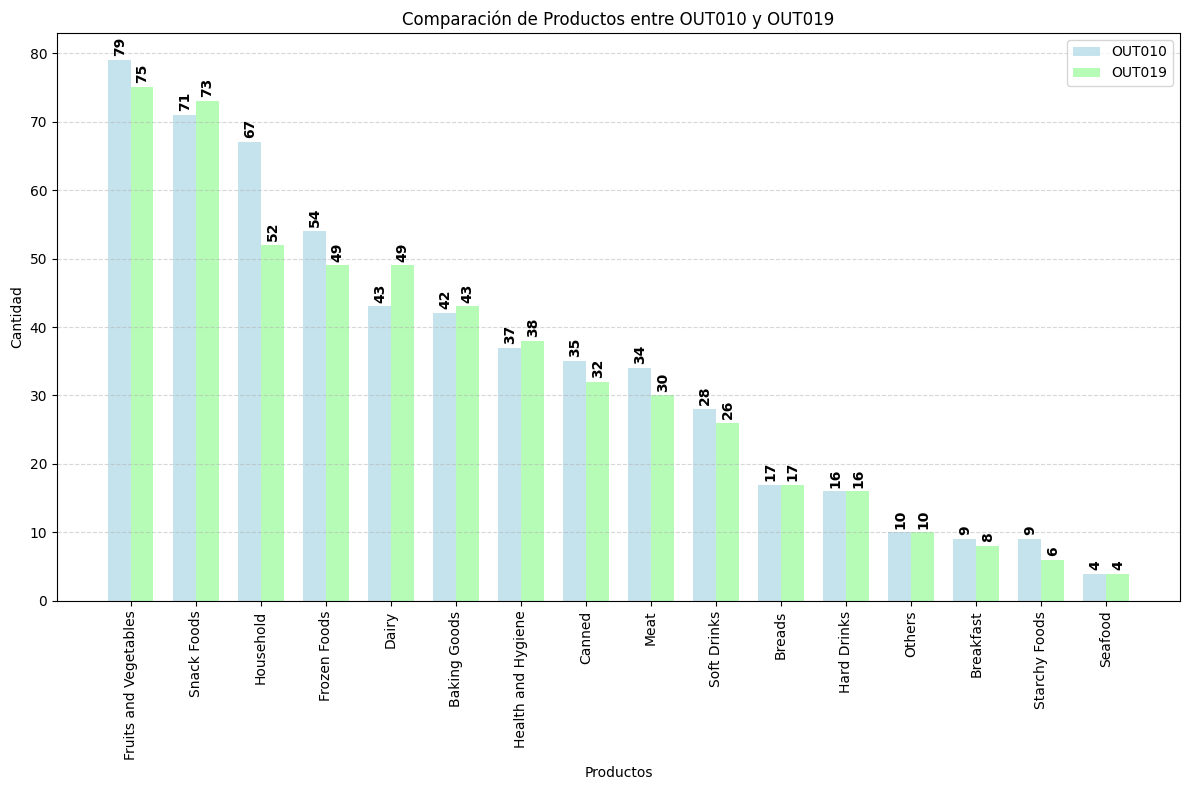

In [60]:
import numpy as np

productos_OUT010 = gf_OUT010['Item_Type']
cantidades_OUT010 = gf_OUT010['Cantidad_Item_Type']
productos_OUT019 = gf_OUT019['Item_Type']
cantidades_OUT019= gf_OUT019['Cantidad_Item_Type']

# Configurar el gráfico de barras
plt.figure(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(productos_OUT010))

# Colores mejorados
colors = ['#ADD8E6' , '#98FB98']

plt.bar(index, cantidades_OUT010, bar_width, alpha=0.7, label='OUT010', color=colors[0])
plt.bar(index + bar_width, cantidades_OUT019, bar_width, alpha=0.7, label='OUT019', color=colors[1])

# Añadir etiquetas de datos
for i, v in enumerate(cantidades_OUT010):
    plt.text(i - 0.1, v + 1, str(v), color='black', fontweight='bold', rotation= 90)

for i, v in enumerate(cantidades_OUT019):
    plt.text(i + bar_width - 0.1, v + 1, str(v), color='black', fontweight='bold', rotation= 90)

plt.xlabel('Productos')
plt.ylabel('Cantidad')
plt.title('Comparación de Productos entre OUT010 y OUT019')
plt.xticks(index + bar_width / 2, productos_OUT010, rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

*Figura 03. Se observa un comportamiento similar entre ambos Tipos de Item, sin emabargo en el Household para OUT010 se presentó una mayor cantidad de venta, lo que pudo haber sido un factor para que tenga mayor volumen de ventas.*

### a) Supermarket Type 01

Se observa el mayor volumen de todas categorías de productos, dentro de esta categoría compararemos dos tiendas para evaluar la cantiad de sus ventas por tipo de producto y ver si se presenta alguna anomalia entre el valor más alto y el más bajo

Valor más alto de ventas: OUT35226.8K

Valor más bajo: OUT045 203.7K

Siendo la tienda OUT035 mayor en ventas totales por un 23.14K USD


In [61]:
filtro_OUT045 = df['Outlet_Identifier'] == 'OUT045'
filtro_OUT035 = df['Outlet_Identifier'] == 'OUT035'
df.loc[filtro_OUT045 | filtro_OUT035,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
19,FDU02,13.350,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
22,NCB30,14.600,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
26,FDV10,7.645,Regular,0.066693,Snack Foods,42.3112,OUT035,2004,Small,Tier 2,Supermarket Type1,1065.2800
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,Small,Tier 2,Supermarket Type1,2174.5028
...,...,...,...,...,...,...,...,...,...,...,...,...
8510,FDN58,13.800,Regular,0.056862,Snack Foods,231.5984,OUT035,2004,Small,Tier 2,Supermarket Type1,7182.6504
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,Small,Tier 2,Supermarket Type1,468.7232
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850


In [63]:
# Reducimos nuestras muestras
df_OUT045 = df.loc[filtro_OUT045,:]
df_OUT035 = df.loc[filtro_OUT035,:]

In [64]:
gf_OUT045 = df_OUT045['Item_Type'].value_counts().reset_index()
gf_OUT045 = gf_OUT045.rename(columns={'index': 'Item_Type', 'Item_Type': 'Cantidad_Item_Type'})
gf_OUT045

,Item_Type,Cantidad_Item_Type
0,Fruits and Vegetables,143
1,Snack Foods,133
2,Household,99
3,Frozen Foods,81
4,Canned,74
5,Baking Goods,70
6,Dairy,69
7,Health and Hygiene,55
8,Soft Drinks,51
9,Meat,38


In [65]:
gf_OUT035 = df_OUT035['Item_Type'].value_counts().reset_index()
gf_OUT035 = gf_OUT035.rename(columns={'index': 'Item_Type', 'Item_Type': 'Cantidad_Item_Type'})
gf_OUT035

,Item_Type,Cantidad_Item_Type
0,Snack Foods,140
1,Fruits and Vegetables,129
2,Household,102
3,Frozen Foods,92
4,Canned,79
5,Dairy,71
6,Baking Goods,68
7,Soft Drinks,52
8,Health and Hygiene,50
9,Meat,43


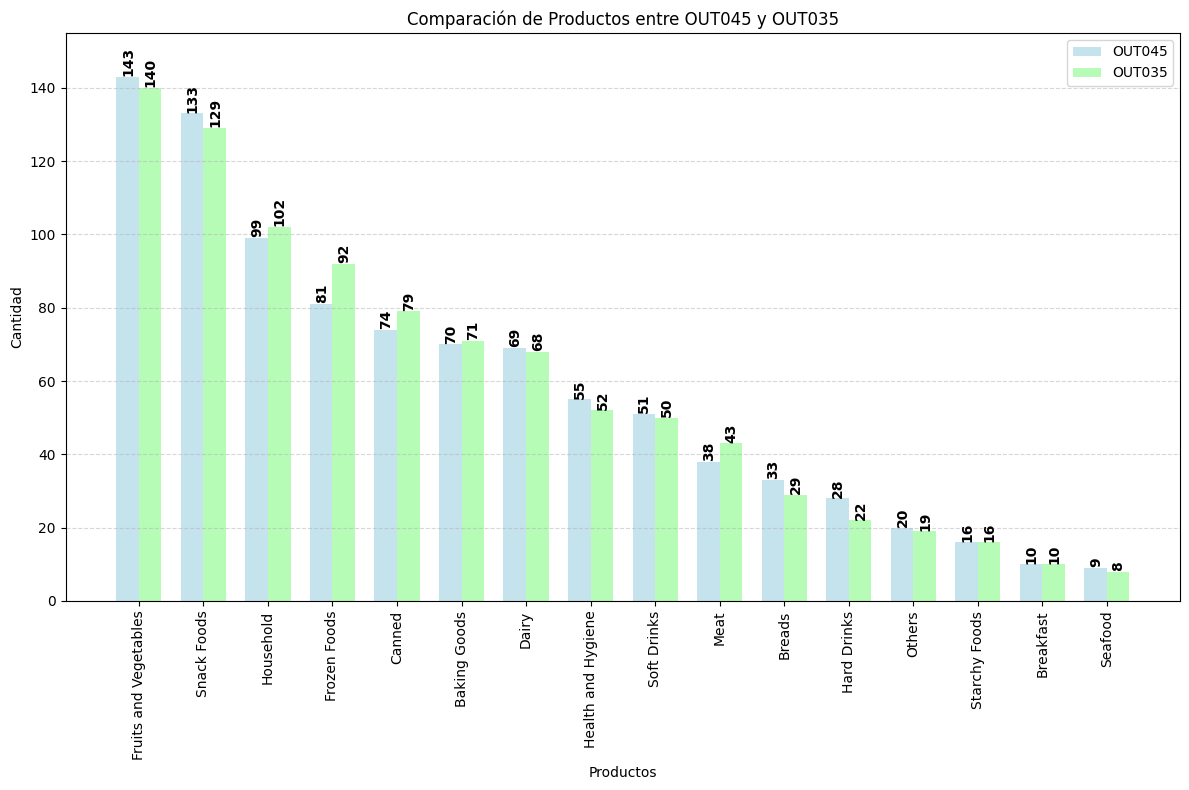

In [70]:
import numpy as np

productos_OUT045 = gf_OUT045['Item_Type']
cantidades_OUT045 = gf_OUT045['Cantidad_Item_Type']
productos_OUT035 = gf_OUT035['Item_Type']
cantidades_OUT035= gf_OUT035['Cantidad_Item_Type']

# Configurar el gráfico de barras
plt.figure(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(productos_OUT045))

# Colores mejorados
colors = ['#ADD8E6' , '#98FB98']

plt.bar(index, cantidades_OUT045, bar_width, alpha=0.7, label='OUT045', color=colors[0])
plt.bar(index + bar_width, cantidades_OUT035, bar_width, alpha=0.7, label='OUT035', color=colors[1])

# Añadir etiquetas de datos
for i, v in enumerate(cantidades_OUT045):
    plt.text(i - 0.1, v + 1, str(v), color='black', fontweight='bold', rotation= 90)

for i, v in enumerate(cantidades_OUT035):
    plt.text(i + bar_width - 0.1, v + 1, str(v), color='black', fontweight='bold', rotation= 90)

plt.xlabel('Productos')
plt.ylabel('Cantidad')
plt.title('Comparación de Productos entre OUT045 y OUT035')
plt.xticks(index + bar_width / 2, productos_OUT045, rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(0,155)

# Mostrar el gráfico
plt.show()

*Figura 04. De la comparación entre la tienda con mayor (OUT035) y menor (OUT045) ventas totales, dentro del Supermarket Type1, observamos que en Frozen Foods se presenta la mayor diferencia, es decir, aqui se puede ver representado un gran porcentaje de la diferencia total de ventas entre ambas tiendas.*

### c) Supermarket Type 02 vs Supermarket Type 03

Finalmente comapraremos los tipos Supermarket tipo 2 y tipo 3, ya que tienen una única tienda, evaluaremos qué puede mejorar el Supermarket Tipo 2 para mejorar sus ventas en comparación al tipo 3

OUT018 Tipo2

OUT027 Tipo3

In [71]:
filtro_OUT018 = df['Outlet_Identifier'] == 'OUT018'
filtro_OUT027 = df['Outlet_Identifier'] == 'OUT027'
df.loc[filtro_OUT018 | filtro_OUT027,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
16,NCB42,11.800,Low Fat,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888
18,DRI11,8.260,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8506,DRF37,17.250,Low Fat,0.084676,Soft Drinks,263.1910,OUT018,2009,Medium,Tier 3,Supermarket Type2,3944.8650
8511,FDF05,17.500,Low Fat,0.026980,Frozen Foods,262.5910,OUT018,2009,Medium,Tier 3,Supermarket Type2,4207.8560
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820


In [72]:
# Reducimos nuestras muestras
df_OUT018 = df.loc[filtro_OUT018,:]
df_OUT027 = df.loc[filtro_OUT027,:]

In [73]:
gf_OUT018 = df_OUT018['Item_Type'].value_counts().reset_index()
gf_OUT018 = gf_OUT018.rename(columns={'index': 'Item_Type', 'Item_Type': 'Cantidad_Item_Type'})
gf_OUT018


,Item_Type,Cantidad_Item_Type
0,Fruits and Vegetables,135
1,Snack Foods,132
2,Household,95
3,Frozen Foods,92
4,Canned,78
5,Dairy,73
6,Baking Goods,68
7,Health and Hygiene,58
8,Soft Drinks,46
9,Meat,46


In [74]:
gf_OUT027 = df_OUT027['Item_Type'].value_counts().reset_index()
gf_OUT027 = gf_OUT027.rename(columns={'index': 'Item_Type', 'Item_Type': 'Cantidad_Item_Type'})
gf_OUT027


,Item_Type,Cantidad_Item_Type
0,Fruits and Vegetables,140
1,Snack Foods,137
2,Household,99
3,Frozen Foods,89
4,Canned,72
5,Baking Goods,69
6,Dairy,67
7,Health and Hygiene,60
8,Meat,56
9,Soft Drinks,45


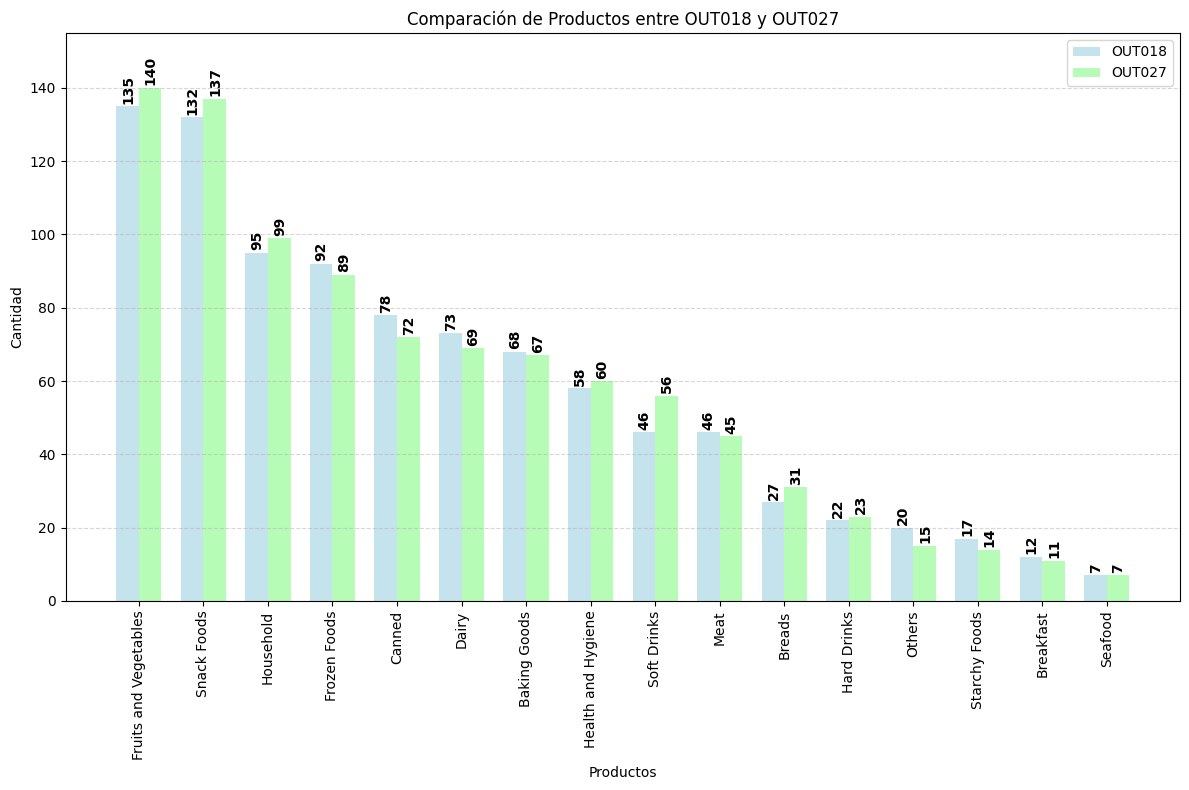

In [77]:
import numpy as np

productos_OUT018 = gf_OUT018['Item_Type']
cantidades_OUT018 = gf_OUT018['Cantidad_Item_Type']
productos_OUT027 = gf_OUT027['Item_Type']
cantidades_OUT027= gf_OUT027['Cantidad_Item_Type']

# Configurar el gráfico de barras
plt.figure(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(productos_OUT018))

# Colores mejorados
colors = ['#ADD8E6' , '#98FB98']

plt.bar(index, cantidades_OUT018, bar_width, alpha=0.7, label='OUT018', color=colors[0])
plt.bar(index + bar_width, cantidades_OUT027, bar_width, alpha=0.7, label='OUT027', color=colors[1])

# Añadir etiquetas de datos
for i, v in enumerate(cantidades_OUT018):
    plt.text(i - 0.1, v + 1.5, str(v), color='black', fontweight='bold', rotation= 90)

for i, v in enumerate(cantidades_OUT027):
    plt.text(i + bar_width - 0.1, v + 1.5, str(v), color='black', fontweight='bold', rotation= 90)

plt.xlabel('Productos')
plt.ylabel('Cantidad')
plt.title('Comparación de Productos entre OUT018 y OUT027')
plt.xticks(index + bar_width / 2, productos_OUT018, rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(0,155)

# Mostrar el gráfico
plt.show()


*Figura 05. De esta relación observamos que han tenido un volumen similar de ventas por cada tipo de producto, así que podemos deducir que el problema no fue la venta de la cantidad de productos, la siguiente variable que puede influir es el precio al cual fue vendido este articulo*